In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import urllib
import urllib.request
from urllib.parse import unquote

import json

import requests
import pprint

from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 

In [2]:
_5min = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/한국전력거래소_5분단위 전력수급현황_20220407.csv', encoding='euc-kr')
solar = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/한국전력거래소_지역별 시간별 태양광 발전량_20230228.csv', encoding='euc-kr')

In [3]:
# plt.plot(_5min['현재수요(MW)'])
_5min

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2012-06-01 00:00,64355.0,51726.33,59400,12628.67,24.41439,12628.67,24.41439
1,2012-06-01 00:05,64355.0,51342.53,60800,13012.47,25.34442,13012.47,25.34442
2,2012-06-01 00:10,64355.0,51583.17,60800,12771.83,24.75969,12771.83,24.75969
3,2012-06-01 00:15,64355.0,51631.69,60800,12723.31,24.64245,12723.31,24.64245
4,2012-06-01 00:20,64355.0,51252.66,60800,13102.35,25.56423,13102.35,25.56423
...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35,82791.9,63877.30,69300,18914.70,29.61100,10803.00,16.91210
1035063,2022-04-07 23:40,82768.1,63525.30,69300,19242.80,30.29160,10696.40,16.83800
1035064,2022-04-07 23:45,82767.9,63506.20,69300,19261.70,30.33040,10501.30,16.53580
1035065,2022-04-07 23:50,82762.4,62819.60,69300,19942.80,31.74610,10706.30,17.04290


<Axes: >

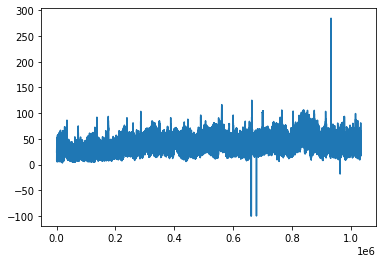

In [6]:
_5min['공급예비율(퍼센트)'].plot()

In [30]:
# (_5min.isnull().sum()/ _5min.shape[0]).sort_values(ascending=False)
(solar.isnull().sum()/ solar.shape[0]).sort_values(ascending=False)

 풍력 발전량(MWh)      0.352941
거래일자              0.000000
거래시간              0.000000
지역                0.000000
 태양광 발전량(MWh)     0.000000
dtype: float64

In [28]:
_5min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035067 entries, 0 to 1035066
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   기준일시        1035067 non-null  object 
 1   공급능력(MW)    1035067 non-null  float64
 2   현재수요(MW)    1035067 non-null  float64
 3   최대예측수요(MW)  1035067 non-null  int64  
 4   공급예비력(MW)   1035067 non-null  float64
 5   공급예비율(퍼센트)  1035067 non-null  float64
 6   운영예비력(MW)   1035067 non-null  float64
 7   운영예비율(퍼센트)  1035067 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 63.2+ MB


In [31]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918000 entries, 0 to 917999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   거래일자            918000 non-null  object
 1   거래시간            918000 non-null  int64 
 2   지역              918000 non-null  object
 3    태양광 발전량(MWh)   918000 non-null  object
 4    풍력 발전량(MWh)    594000 non-null  object
dtypes: int64(1), object(4)
memory usage: 35.0+ MB


In [40]:
solar[' 태양광 발전량(MWh) ']
# solar.columns

0             
1             
2             
3             
4             
          ... 
917995    3.59
917996    3.46
917997    2.71
917998    0.82
917999    0.18
Name:  태양광 발전량(MWh) , Length: 918000, dtype: object

In [43]:
solar

,거래일자,거래시간,지역,태양광 발전량(MWh),풍력 발전량(MWh)
0,2017-01-01,1,경기도,,0.01
1,2017-01-01,2,경기도,,
2,2017-01-01,3,경기도,,
3,2017-01-01,4,경기도,,0.01
4,2017-01-01,5,경기도,,0.02
...,...,...,...,...,...
917995,2023-02-28,20,부산시,3.59,
917996,2023-02-28,21,부산시,3.46,
917997,2023-02-28,22,부산시,2.71,
917998,2023-02-28,23,부산시,0.82,


## 기상청 API 허브

https://apihub.kma.go.kr/
<br>예특보

https://apihub.kma.go.kr/api/typ01/url/fct_afs_dl.php?authKey=yEtC0d2xQmKLQtHdsWJi5g

단기예보특보

http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst?serviceKey=dN%2FllUgYKJLRNhR0021nUWL9K1mw%2BVGerpz3ROJEVnDbOKfmQt20uESkPz2w9ccaRfHG8dHu6g7%2Bg14HnOZ1tA%3D%3D&pageNo=1&numOfRows=1000

In [248]:
# url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst'
# params ={'serviceKey' : 'dN%2FllUgYKJLRNhR0021nUWL9K1mw%2BVGerpz3ROJEVnDbOKfmQt20uESkPz2w9ccaRfHG8dHu6g7%2Bg14HnOZ1tA%3D%3D', 
#          'pageNo' : '1', 
#          'numOfRows' : '1000', 
#          'dataType' : 'xml'}
#          , 
#          'base_date' : '20210628', 
#          'base_time' : '0600', 
#          'nx' : '55', 
#          'ny' : '127'}
url = 'https://apihub.kma.go.kr/api/typ01/url/fct_afs_do.php?reg=&tmfc1=2013121106&tmfc2=2013121118&disp=0&help=1&authKey=yEtC0d2xQmKLQtHdsWJi5g'

response = requests.get(url)#, params=params)
# print(response.content)
text = response.text


In [249]:
pp = pprint.PrettyPrinter(indent=4)
# print(pp.pprint(text))


In [250]:
text = text.split('\n')

In [251]:
text

['#START7777',
 '#--------------------------------------------------------------------------------------------------\r',
 '#  단기예보 해상 조회 [입력인수형태][예] ?reg=&tmfc1=2013121018&tmfc2=2013121106&disp=0&help=1\r',
 '#--------------------------------------------------------------------------------------------------\r',
 '#  1. REG_ID   : 예보구역코드\r',
 '#  2. TM_FC    : 발표시각(년월일시분,KST)\r',
 '#  3. TM_EF    : 발효시각(년월일시분,KST)\r',
 '#  4. MOD      : 구간 (A01(24시간),A02(12시간))\r',
 '#  5. NE       : 발효번호\r',
 '#  6. STN      : 발표관서\r',
 '#  7. C        : 발표코드\r',
 '#  8. MAN_ID   : 예보관ID\r',
 '#  9. MAN_FC   : 예보관명\r',
 '# 10. W1       : 풍향1(16방위)\r',
 '# 11. T        : 풍향경향(1:-, 2:후)\r',
 '# 12. W2       : 풍향2(16방위)\r',
 '# 13. TA       : 기온\r',
 '# 14. ST       : 강수확률(%)\r',
 '# 15. SKY      : 하늘상태코드 (DB01(맑음),DB02(구름조금),DB03(구름많음),DB04(흐림))\r',
 '# 16. PREP     : 강수유무코드 (1(비),2(비/눈),4(눈/비),3(눈))\r',
 '# 17. WF       : 예보\r',
 '#------------------------------------------------------------------------

In [252]:
# columns
col_name = text[22].split()
col_name = col_name[1:]
col_name

['REG_ID',
 'TM_FC',
 'TM_EF',
 'MOD',
 'NE',
 'STN',
 'C',
 'MAN_ID',
 'MAN_FC',
 'W1',
 'T',
 'W2',
 'S1',
 'S2',
 'WH1',
 'WH2',
 'SKY',
 'PREP',
 'WF']

In [253]:
df = pd.DataFrame(text[23:-2])[0].str.split(expand=True)
df.drop(columns=21, inplace=True)
df.fillna('',inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,12A10000,201312111100,201312111200,A02,0,108,2,joonmo,전준모,W,...,NW,12,16,2.0,4.0,DB03,0,"""구름많음""",,
1,12A10000,201312111100,201312120000,A02,1,108,2,joonmo,전준모,W,...,NW,8,12,1.0,2.0,DB03,3,"""구름많고","눈""",
2,12A10000,201312111100,201312121200,A02,2,108,2,joonmo,전준모,W,...,NW,9,13,1.5,2.5,DB03,0,"""구름많음""",,
3,12A10000,201312111100,201312130000,A02,3,108,2,joonmo,전준모,NW,...,N,8,12,1.0,2.0,DB03,0,"""구름많음""",,
4,12A10100,201312111100,201312111200,A02,0,107,2,skim,김승범,W,...,NW,10,14,2.0,3.0,DB03,0,"""구름많음""",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,22A30104,201312111700,201312130000,A02,3,156,2,jhdon1,주형돈,W,...,NW,8,12,1.0,1.5,DB03,0,"""구름많음""",,
388,22A30105,201312111700,201312111200,A02,0,156,2,jhdon1,주형돈,W,...,NW,10,16,2.0,3.0,DB03,3,"""구름많고",가끔,"눈"""
389,22A30105,201312111700,201312120000,A02,1,156,2,jhdon1,주형돈,W,...,NW,9,13,1.0,2.0,DB03,0,"""구름많음""",,
390,22A30105,201312111700,201312121200,A02,2,156,2,jhdon1,주형돈,W,...,NW,8,13,1.0,2.0,DB03,0,"""구름많음""",,


In [254]:
for i in range(len(df)):
    df[21] = ''

In [255]:
for i in range(len(df)):
    a = df[18][i]
    b = df[19][i]
    c = df[20][i]
    
    df[21][i] = (a + ' ' + b + ' ' + c)

In [256]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,12A10000,201312111100,201312111200,A02,0,108,2,joonmo,전준모,W,...,12,16,2.0,4.0,DB03,0,"""구름많음""",,,"""구름많음"""
1,12A10000,201312111100,201312120000,A02,1,108,2,joonmo,전준모,W,...,8,12,1.0,2.0,DB03,3,"""구름많고","눈""",,"""구름많고 눈"""
2,12A10000,201312111100,201312121200,A02,2,108,2,joonmo,전준모,W,...,9,13,1.5,2.5,DB03,0,"""구름많음""",,,"""구름많음"""
3,12A10000,201312111100,201312130000,A02,3,108,2,joonmo,전준모,NW,...,8,12,1.0,2.0,DB03,0,"""구름많음""",,,"""구름많음"""
4,12A10100,201312111100,201312111200,A02,0,107,2,skim,김승범,W,...,10,14,2.0,3.0,DB03,0,"""구름많음""",,,"""구름많음"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,22A30104,201312111700,201312130000,A02,3,156,2,jhdon1,주형돈,W,...,8,12,1.0,1.5,DB03,0,"""구름많음""",,,"""구름많음"""
388,22A30105,201312111700,201312111200,A02,0,156,2,jhdon1,주형돈,W,...,10,16,2.0,3.0,DB03,3,"""구름많고",가끔,"눈""","""구름많고 가끔 눈"""
389,22A30105,201312111700,201312120000,A02,1,156,2,jhdon1,주형돈,W,...,9,13,1.0,2.0,DB03,0,"""구름많음""",,,"""구름많음"""
390,22A30105,201312111700,201312121200,A02,2,156,2,jhdon1,주형돈,W,...,8,13,1.0,2.0,DB03,0,"""구름많음""",,,"""구름많음"""


In [257]:
df.drop(columns = [18, 19, 20], inplace=True)

In [258]:
df.columns = col_name
df

,REG_ID,TM_FC,TM_EF,MOD,NE,STN,C,MAN_ID,MAN_FC,W1,T,W2,S1,S2,WH1,WH2,SKY,PREP,WF
0,12A10000,201312111100,201312111200,A02,0,108,2,joonmo,전준모,W,1,NW,12,16,2.0,4.0,DB03,0,"""구름많음"""
1,12A10000,201312111100,201312120000,A02,1,108,2,joonmo,전준모,W,1,NW,8,12,1.0,2.0,DB03,3,"""구름많고 눈"""
2,12A10000,201312111100,201312121200,A02,2,108,2,joonmo,전준모,W,1,NW,9,13,1.5,2.5,DB03,0,"""구름많음"""
3,12A10000,201312111100,201312130000,A02,3,108,2,joonmo,전준모,NW,1,N,8,12,1.0,2.0,DB03,0,"""구름많음"""
4,12A10100,201312111100,201312111200,A02,0,107,2,skim,김승범,W,1,NW,10,14,2.0,3.0,DB03,0,"""구름많음"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,22A30104,201312111700,201312130000,A02,3,156,2,jhdon1,주형돈,W,1,NW,8,12,1.0,1.5,DB03,0,"""구름많음"""
388,22A30105,201312111700,201312111200,A02,0,156,2,jhdon1,주형돈,W,1,NW,10,16,2.0,3.0,DB03,3,"""구름많고 가끔 눈"""
389,22A30105,201312111700,201312120000,A02,1,156,2,jhdon1,주형돈,W,1,NW,9,13,1.0,2.0,DB03,0,"""구름많음"""
390,22A30105,201312111700,201312121200,A02,2,156,2,jhdon1,주형돈,W,1,NW,8,13,1.0,2.0,DB03,0,"""구름많음"""
